In [1]:
import numpy as np
data = np.loadtxt('20000.txt',skiprows=16)
print('data shape:',data.shape)

data shape: (32768, 7)


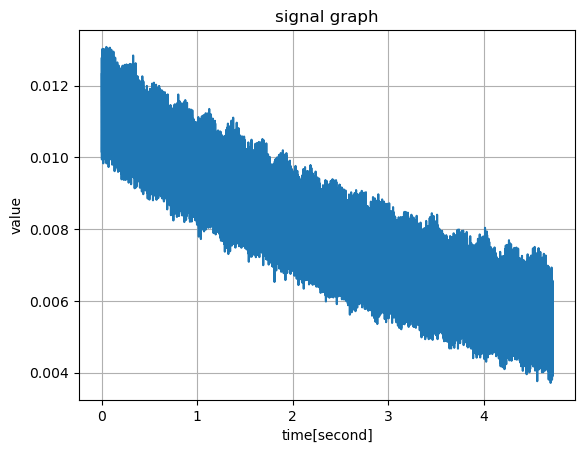

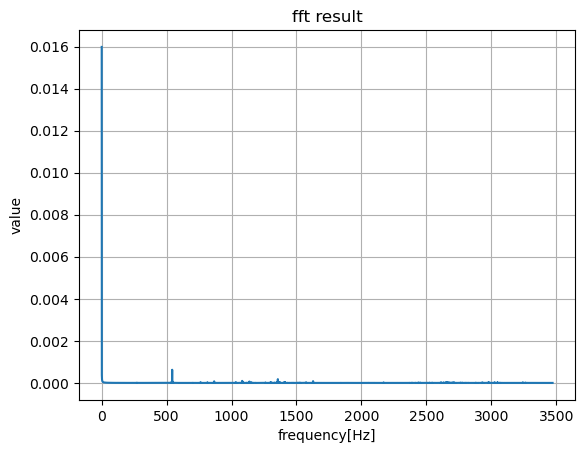

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline
signal = data[:,2]
fft_result = np.fft.fft(signal)
sample_rate = 3333/0.47993081
delta = 1/sample_rate
time = delta * np.array(range(32768))
fft_freq = np.fft.fftfreq(32768,d=delta)
fft_result_act = np.abs(fft_result)[:32768//2] * 2 / 32768
fft_freq_act = fft_freq[:32768//2]
plt.figure(1)
plt.plot(time,signal)
plt.xlabel('time[second]')
plt.ylabel('value')
plt.title('signal graph')
plt.grid(True)
plt.figure(2)
plt.plot(fft_freq_act,fft_result_act)
plt.xlabel('frequency[Hz]')
plt.ylabel('value')
plt.title('fft result')
plt.grid(True)
plt.show()

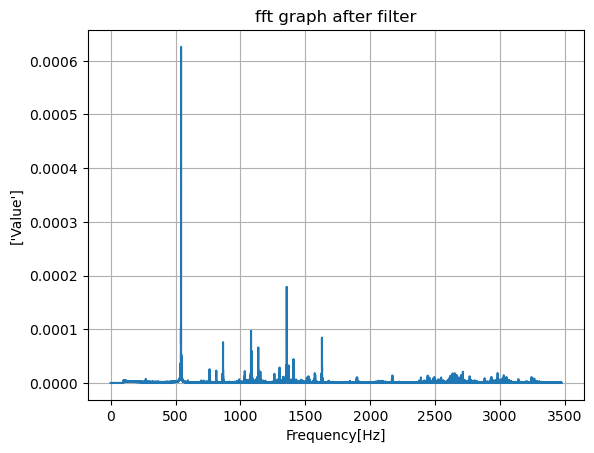

In [3]:
cutoff_freq = 100
filter_mask = np.abs(fft_freq) > cutoff_freq
fft_filter = fft_result * filter_mask
fft_filter_act = np.abs(fft_filter)[:32768//2] * 2 / 32768
plt.figure(3)
plt.plot(fft_freq_act,fft_filter_act)
plt.xlabel('Frequency[Hz]')
plt.ylabel(['Value'])
plt.title('fft graph after filter')
plt.grid(True)
plt.show()

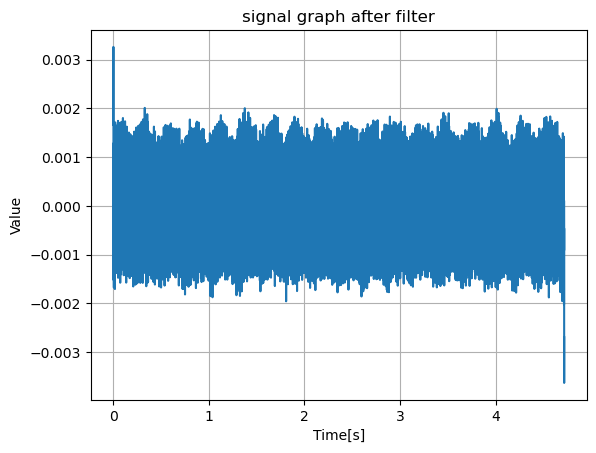

In [4]:
signal_filter = np.fft.ifft(fft_filter)
signal_filter_real = np.real(signal_filter)
plt.figure(4)
plt.plot(time,signal_filter_real)
plt.xlabel('Time[s]')
plt.ylabel('Value')
plt.grid(True)
plt.title('signal graph after filter')
plt.show()